In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [13]:
df_objects = pd.read_csv('data/cb_objects.csv', parse_dates=['founded_at'])
df_ipo = pd.read_csv('data/cb_ipos.csv')
df_acquisitions = pd.read_csv('data/cb_acquisitions.csv')

/Users/cosmakufa/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,7,10,17,18,21,22,23,25,26,29,30,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
keep =[  'parent_id', 
       'normalized_name', 'category_code',  'founded_at',
        'domain', 'twitter_username',
        'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships',
       ]
keeps =[  'parent_id', 
       'normalized_name', 'category_code',  'founded_at',
        'domain', 'twitter_username',
        'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region','status',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships',
       ]
removed = ['id', 'entity_type', 'entity_id', 'name', 'permalink',  'closed_at', 'homepage_url',  'logo_url', 'logo_width', 'logo_height','created_by', 'created_at', 'updated_at']

In [11]:
df_objects.status.value_counts(1)

operating      0.958958
acquired       0.020305
live           0.009400
closed         0.005994
ipo            0.002451
beta           0.001686
development    0.000488
private        0.000473
alpha          0.000244
Name: status, dtype: float64

In [14]:
df_objects[keeps].head().T

,0,1,2,3,4
parent_id,NaN,NaN,NaN,NaN,NaN
normalized_name,wetpaint,flektor,there,mywebbo,the movie streamer
category_code,web,games_video,games_video,network_hosting,games_video
founded_at,2005-10-17 00:00:00,NaT,NaT,2008-07-26 00:00:00,2008-07-26 00:00:00
domain,wetpaint-inc.com,flektor.com,there.com,mywebbo.com,themoviestreamer.com
twitter_username,BachelrWetpaint,NaN,NaN,NaN,NaN
short_description,NaN,NaN,NaN,NaN,NaN
description,Technology Platform Company,NaN,NaN,NaN,NaN
overview,Wetpaint is a technology platform company that...,Flektor is a rich-media mash-up platform that ...,There.com is an online virtual world where any...,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...",This company shows free movies online on their...
tag_list,"wiki, seattle, elowitz, media-industry, media-...","flektor, photo, video","virtualworld, there, teens","social-network, new, website, web, friends, ch...","watch, full-length, moives, online, for, free,..."


In [16]:
df_objects['year'] = df_objects['founded_at'].apply( lambda x: x.year if x else x)

In [31]:
grouping.sort_values(ascending=False).head(50)

country_code
USA    53041
GBR     7706
IND     3976
CAN     3874
DEU     2085
FRA     1812
AUS     1514
ESP     1157
ISR     1118
IRL      998
NLD      930
CHN      754
SWE      752
ITA      659
FIN      600
CHE      590
SGP      568
BRA      565
JPN      520
RUS      486
Name: domain, dtype: int64

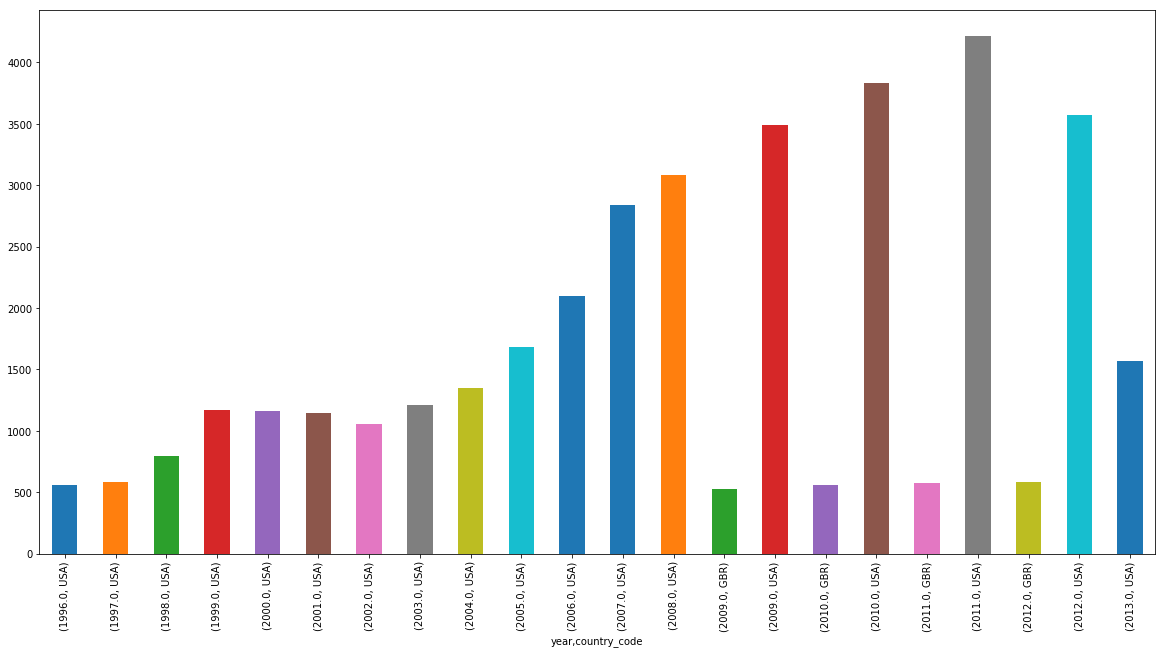

In [33]:
grouping = df_objects.groupby(['year','country_code']).count()['domain']

grouping[(grouping > 500)].plot(kind="bar", figsize=(20,10));

In [7]:
df_objects = df_objects[(df_objects['status'].isin(['acquired','closed', 'ipo']))]
df_objects.status.value_counts(1)

acquired    0.706263
closed      0.208481
ipo         0.085257
Name: status, dtype: float64

In [ ]:
df_ipo.head()

In [ ]:
df_acquisitions.head()

In [8]:
df_joined = df_objects.set_index("id").join(df_ipo.set_index("object_id"), rsuffix="_ipo").join(df_acquisitions.set_index("acquired_object_id"),  rsuffix="_acq")

In [ ]:
df_joined.head().T

In [9]:
target = df_joined.apply(lambda x: 0 if (pd.isnull(x['id_acq']) and pd.isnull(x['ipo_id']))  else 1, axis =1)

In [ ]:
df_joined.info()

In [ ]:
df_objects[keep].info()

In [10]:
df_num = df_joined[keep]._get_numeric_data()

In [11]:
df_num = df_num.fillna(df_num.mean())

In [12]:
df_num.head().T

,c:10,c:100,c:1001,c:10012,c:10014
investment_rounds,3.322857e+00,3.322857e+00,3.322857e+00,3.322857e+00,3.322857e+00
invested_companies,2.860000e+00,2.860000e+00,2.860000e+00,2.860000e+00,2.860000e+00
funding_rounds,1.750383e+00,1.750383e+00,1.000000e+00,1.750383e+00,1.000000e+00
funding_total_usd,2.504158e+07,2.504158e+07,5.000000e+06,2.504158e+07,2.504158e+07
milestones,1.711087e+00,4.000000e+00,3.000000e+00,1.711087e+00,4.000000e+00
relationships,6.000000e+00,1.200000e+01,1.400000e+01,1.000000e+00,9.000000e+00


In [28]:
len(target)

13452

In [29]:
len(df_num)

13452

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf = RandomForestClassifier(max_depth=5, random_state=0, class_weight='balanced')

In [15]:
model = clf.fit(df_num.values, target.values)


In [16]:
list(df_num.columns)

['investment_rounds',
 'invested_companies',
 'funding_rounds',
 'funding_total_usd',
 'milestones',
 'relationships']

In [17]:
list(zip(model.feature_importances_, list(df_num.columns)))

[(0.002363850252670662, 'investment_rounds'),
 (0.008003697991858188, 'invested_companies'),
 (0.4999623980284392, 'funding_rounds'),
 (0.33413586235932397, 'funding_total_usd'),
 (0.04077631639043312, 'milestones'),
 (0.11475787497727483, 'relationships')]

In [18]:
y_hat = model.predict(df_num.values)

In [19]:
y_hat_p= np.array(list(list(zip(* model.predict_proba(df_num.values)))[0]))

In [20]:
from sklearn import metrics

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(target, y_hat_p)

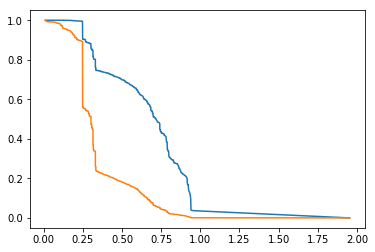

In [22]:
plt.plot(thresholds, fpr);
plt.plot(thresholds, tpr);

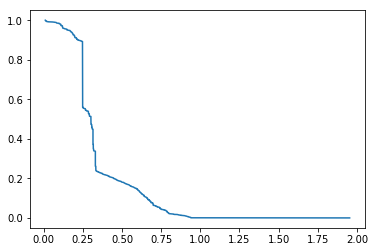

In [23]:
plt.plot(thresholds, tpr);

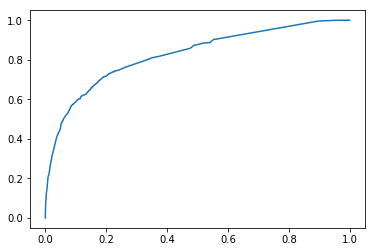

In [24]:
plt.plot(tpr,fpr);

In [25]:
target.value_counts(1)

1    0.79386
0    0.20614
dtype: float64

In [26]:
pd.DataFrame(y_hat).count()

0    13452
dtype: int64

In [27]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

In [84]:
def my_roc_curve(y_true, y_pred):
    xaxis= np.linspace(0, 1, 100)
    result = np.zeros(xaxis.shape)
    
    for i,x in enumerate(xaxis):
        y_pred2 = y_pred.copy()
        y_pred2[(y_pred2 >= x)] = 1
        y_pred2[(y_pred2 < x)] = 0
        result[i] = f1_score(target,y_pred2)
    return (xaxis, result)
my_roc_curve(target, y_hat)
      

(array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
        0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
        0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
        0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
        0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
        0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
        0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
        0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
        0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
        0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
        0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
        0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
        0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
        0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
        0.70707071, 0.71717172, 0.72727273, 0.73

In [85]:
f1_score(target,y_hat)

0.863418727479145

In [86]:
recall_score(target,y_hat)

0.8189905421855979

In [87]:
precision_score(target, y_hat)

0.9129436325678497

In [94]:
correct = df_joined[ (y_hat == 1) & (target == 1)]

In [95]:
correct.status.value_counts()

acquired    7812
ipo          934
Name: status, dtype: int64

In [96]:
confusion_matrix(target,y_hat)

array([[1939,  834],
       [1933, 8746]])

In [97]:
 from sklearn.metrics import f1_score

In [98]:
def confusion_matrix_percent(target, y_hat):
    vc_Structure = np.array([[-1,0],[0,100]])
    result = confusion_matrix(target,y_hat) / len(target) * 100
    print(result)
    print(result * vc_Structure)
    print(np.sum(result * vc_Structure))
    
confusion_matrix_percent(target,y_hat)

[[14.4142135   6.19982159]
 [14.36961047 65.01635445]]
[[ -14.4142135     0.        ]
 [   0.         6501.63544454]]
6487.221231043712


In [ ]:
df_investments['created_at'].sort_values()

the information was collected between May 2007 and and December 2013